In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

   

In [56]:


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target



In [36]:
df=pd.read_csv('watermelon.csv',delimiter=' ',header=None)
print(df)
X=df.iloc[:,:2].values
y=df.iloc[:,-1].values

        0      1  2
0   0.697  0.460  1
1   0.774  0.376  1
2   0.634  0.264  1
3   0.608  0.318  1
4   0.556  0.215  1
5   0.403  0.237  1
6   0.481  0.149  1
7   0.437  0.211  1
8   0.666  0.091  0
9   0.243  0.267  0
10  0.245  0.057  0
11  0.343  0.099  0
12  0.639  0.161  0
13  0.657  0.198  0
14  0.360  0.370  0
15  0.593  0.042  0
16  0.719  0.103  0


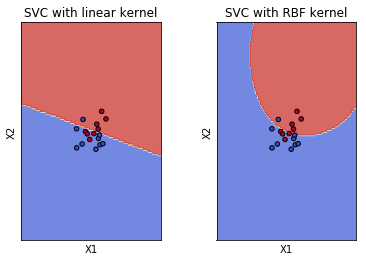

In [49]:

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 10  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),       
          svm.SVC(kernel='rbf', gamma=0.7, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# for clf,name in zip(models,titles):
#     print("{:<20}\t{:<12}\t{:<30}".format(name," Accuracy:",np.array(clf.predict(X)==y).mean()))
    
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax,m in zip(models, titles, sub.flatten(),marks):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False  True False  True False  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True  True False
  True False  True  True  True  True False False  True  True  True  True
  True  True False  True  True  True False  True  True  True False  True
  True  True False  True  True False]
SVC with linear kernel	 Accuracy:  	0.82                          
SVC with RBF kernel

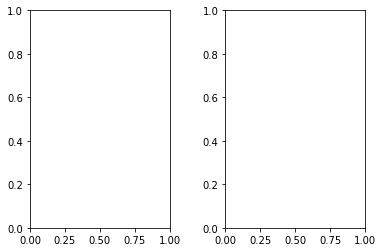

In [67]:

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),       
          svm.SVC(kernel='rbf', gamma=0.7, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

print(np.array(clf.predict(X)==y))
for clf,name in zip(models,titles):
    print("{:<20}\t{:<12}\t{:<30}".format(name," Accuracy:",np.array(clf.predict(X)==y).mean()))
    
# X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     plot_contours(ax, clf, xx, yy,
#                   cmap=plt.cm.coolwarm, alpha=0.8)
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel('Sepal length')
#     ax.set_ylabel('Sepal width')
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

# plt.show()


In [53]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
print(np.mean(np.array(clf.predict(iris.data)==iris.target)))

1.0
